In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import MeCab
import re
import mojimoji
from janome.tokenizer import Tokenizer
import japanize_matplotlib
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Load the CSV file
df = pd.read_csv('period_3.csv', encoding='utf-8')
df.head()

,口コミ,投稿日
0,送迎バスから急坂を上がりますが、湯の里の露天風呂は広々していて好きです。お部屋は、和洋室を選...,2023-08-30
1,家族3人で宿泊させていただきました。送迎バスがあるのでとても助かりました！夕食のお肉とお魚が...,2023-08-28
2,高台にあるため徒歩はかなりきつい。ホテルの場所、駐車場も分かりにくい。敷き布団が薄く二枚重ね...,2023-08-27
3,小田原城などを観光した後、翌日の大涌谷・芦ノ湖など箱根を観光するためにこちらのホテルを利用さ...,2023-08-15
4,温泉がすごくよかったです！！温泉を売りにしたお宿な気がします！夕飯はとても良かったですが、朝...,2023-08-14


In [3]:
# CSVファイルからデータフレームを読み込む
df = pd.read_csv('period_3.csv')

# MECABのインスタンスを生成
m = MeCab.Tagger("-Ochasen")

# 形態素解析を行い、結果を返す関数
def preprocess_text(text):
    # 全角を半角に変換
    text = mojimoji.zen_to_han(text, kana=False)
    
    # 数字を全て0に変換
    text = re.sub(r'[0-9]+', '0', text)
    
    # 形態素解析
    tokens = m.parse(text).split("\n")
    words = []
    for token in tokens[:-2]:  # EOSと空白を除く
        parts = token.split("\t")
        if parts[3].startswith(include_pos) and parts[0] not in stopwords:
            words.append(parts[0])
    
    return " ".join(words)

include_pos = ('名詞') # Considering only nouns for simplicity

# 既存のストップワード
stopwords = ('温泉','露天風呂','wi','fi','なに','以下','おすすめ','コス','みたい','今回','利用','部屋','風呂','料理',
'旅行','スタッフ','対応','お世話','しまう','くれる','ゆっくり','この','ちょっと','てる','良い','ただ','少し','思う','まで'
,'さん','せる','です','ます','から','なる','れる','こと','たい','ので','とても','もらう','もらえる','できる','また','ツル'
,'する', 'ある', 'ない', 'いう', 'もの', 'ところ', 'よう', 'これ', 'ため', 'それ', 'とき', 'それぞれ', 'これら', 'よる'
,'くる','1','2','3','一','さ','い','の','し','いる','よかっ','き','おか','なり','くれ','ん','そう','品数','何','二','肉'
,'どれ','こちら','中','ふき','おしり','しゃぶしゃぶ','ヶ所','フレンチ','パン','ビュッフェ','一つ','とこ','ここ','つき',
'小分け','ケーキ','わけ','トング','0','!','方','時')


# 指定されたカラムのテキストに前処理を適用
df["preprocessed_text"] = df["口コミ"].apply(preprocess_text)


# 新しいカラムを含むデータフレームをCSVファイルに保存
df.to_csv('period_3_preprocessed.csv', index=False)

# 結果を確認
df.head()

,口コミ,投稿日,preprocessed_text
0,送迎バスから急坂を上がりますが、湯の里の露天風呂は広々していて好きです。お部屋は、和洋室を選...,2023-08-30,送迎 バス 急坂 湯の里 好き 和洋 室 土地 柄 ? 天気 ? 感じ クーラー 地下 食事...
1,家族3人で宿泊させていただきました。送迎バスがあるのでとても助かりました！夕食のお肉とお魚が...,2023-08-28,家族 人 宿泊 送迎 バス 夕食 魚 量 丁度 盛り こども 満足 場所 ごと 温度 体質 ...
2,高台にあるため徒歩はかなりきつい。ホテルの場所、駐車場も分かりにくい。敷き布団が薄く二枚重ね...,2023-08-27,高台 徒歩 ホテル 場所 駐車 場 敷き布団 枚 隣 声 食事 料金 人 向き ホテル
3,小田原城などを観光した後、翌日の大涌谷・芦ノ湖など箱根を観光するためにこちらのホテルを利用さ...,2023-08-15,小田原 城 観光 後 翌日 涌谷 芦ノ湖 箱根 観光 ホテル 車 ナビ 町 奥 案内 どこ ...
4,温泉がすごくよかったです！！温泉を売りにしたお宿な気がします！夕飯はとても良かったですが、朝...,2023-08-14,!! 宿 気 夕飯 朝食 バリエーション 不足 残念 トイレ アンモニア 臭 際 毎回 カギ...


In [4]:
# 単語の頻出回数をカウントする
words_count = Counter()

# DataFrameの各行に対して単語をカウント
for text in df["preprocessed_text"]:
    words_count.update(text.split())

# ストップワードの除外
for sw in stopwords:
    if sw in words_count:
        del words_count[sw]

# 頻出単語とその回数をランキング形式で取得
word_ranking = words_count.most_common()

# トップ10の単語とその回数を出力
for word, freq in word_ranking[:10]:
    print(f"{word}: {freq}回")

ホテル: 120回
食事: 111回
宿: 93回
人: 89回
満足: 84回
夕食: 83回
朝食: 82回
箱根: 61回
宿泊: 59回
家族: 58回


In [ ]:
import numpy as np
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel, LdaModel
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# あらかじめ分かち書き済みのテキストを用意
texts = df["preprocessed_text"].str.split()

# Gensimの辞書を作成
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# PerplexityとCoherenceの評価値を格納するリスト
perplexity_values = []
coherence_values = []

# 考慮するトピック数の範囲
topic_range = range(2, 21) # 例: 2〜20のトピック数を試す

for num_topics in topic_range:
    # LDAの学習
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=0)

    # Perplexity
    perplexity_values.append(lda.log_perplexity(corpus))

    # Coherence
    coherence_model = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())

# 評価指標のプロット
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# Perplexity
plt.subplot(1, 2, 1)
plt.plot(topic_range, perplexity_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.title("LDA Model Perplexity")

# Coherence
plt.subplot(1, 2, 2)
plt.plot(topic_range, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence")
plt.title("LDA Model Coherence")

plt.tight_layout()
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# ファイルパスのリスト（各期間に対応するファイル）
file_paths = ['period_3_preprocessed.csv']

# トピックごとのキーワードを取得する関数
def get_top_words(model, feature_names, n_top_words):
    topics_keywords = []
    for topic_idx, topic in enumerate(model.components_):
        topics_keywords.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return topics_keywords

# 各ファイルに対してトピック分析を行う
for file_path in file_paths:
    # データフレームを読み込む
    df = pd.read_csv(file_path)
    # 欠損値を空文字列で置き換え
    df["preprocessed_text"] = df["preprocessed_text"].fillna("")
    # TF-IDFによるベクトル化
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
    tfidf = tfidf_vectorizer.fit_transform(df["preprocessed_text"])

    # LDAの設定と学習
    n_topics = 10  # トピック数は適宜調整してください
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', random_state=0)
    lda.fit(tfidf)

    n_top_words = 13  # トピックごとに表示するキーワード数
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    topics_keywords_list = get_top_words(lda, tfidf_feature_names, n_top_words)

    # トピックとキーワードをDataFrameで表示
    df_topics = pd.DataFrame(topics_keywords_list, index=[f"Topic {i+1}" for i in range(n_topics)])
    print(f"\nTop words in topics for {file_path}:")
    
    display(df_topics)


Top words in topics for period_3_preprocessed.csv:


,0,1,2,3,4,5,6,7,8,9,10,11,12
Topic 1,喫煙,人数,無難,山側,汚れ,管理,食堂,ツイン,滞在,ペンション,施設,大変,清掃
Topic 2,最高,サウナ,支援,コース,イメージ,和食,気分,客室,食事,トースト,特別,浴場,コスパ
Topic 3,孫娘,追加,宿泊,最後,最初,安心,夕食,全国,ラウンジ,ウエルカム,ハンバーグ,専用,最高
Topic 4,箱根,大変,朝食,期待,食事,予約,正直,満足,チェックイン,全体,ホテル,夕食,リーズナブル
Topic 5,親子,夕食,家族,照明,富士山,布団,バランス,暖炉,気配り,記念,テレビ,天気,非常
Topic 6,バイキング,駐車,メニュー,桃源,入口,徒歩,補充,メイン,すき焼き,綺麗,食事,リラックス,子ども
Topic 7,浴槽,陶器,以前,最高,プラデュジュール,毎回,ゴルフ,トイレ,車椅子,玄関,年末年始,皆様,清掃
Topic 8,ホテル,お湯,残念,食事,時間,浴場,満足,家族,接客,客室,宿泊,普通,口コミ
Topic 9,細やか,プラン,便利,心遣い,陶器,紅葉,ゴルフ,様々,アレルギー,要望,素泊まり,寝心地,心地
Topic 10,バス停,楽しみ,笑顔,ワイン,管理,送迎,倶楽部,四季,種類,便利,いつ,温度,機関


In [14]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import MeCab
import pandas as pd

# MeCabの初期化 (辞書の指定などに応じて引数を変更してください)
mecab = MeCab.Tagger('-Ochasen')

# 形態素解析と品詞のフィルタリングを行う関数
def tokenize(text):
    tokens = []
    node = mecab.parseToNode(text)
    while node:
        # 品詞をチェックし、特定の品詞の場合のみトークンに追加
        if node.feature.split(',')[0] in ['名詞']:
            tokens.append(node.surface)
        node = node.next
    return tokens

# 文書のリストを形態素解析して単語のリストを作成
texts = [tokenize(document) for document in df['preprocessed_text']]

# Gensimの辞書とコーパスを作成
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


# LDAモデルの学習
n_topics = 10
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topics, random_state=0, update_every=1, passes=10, alpha='auto', per_word_topics=True)

# pyLDAvisを用いた可視化
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

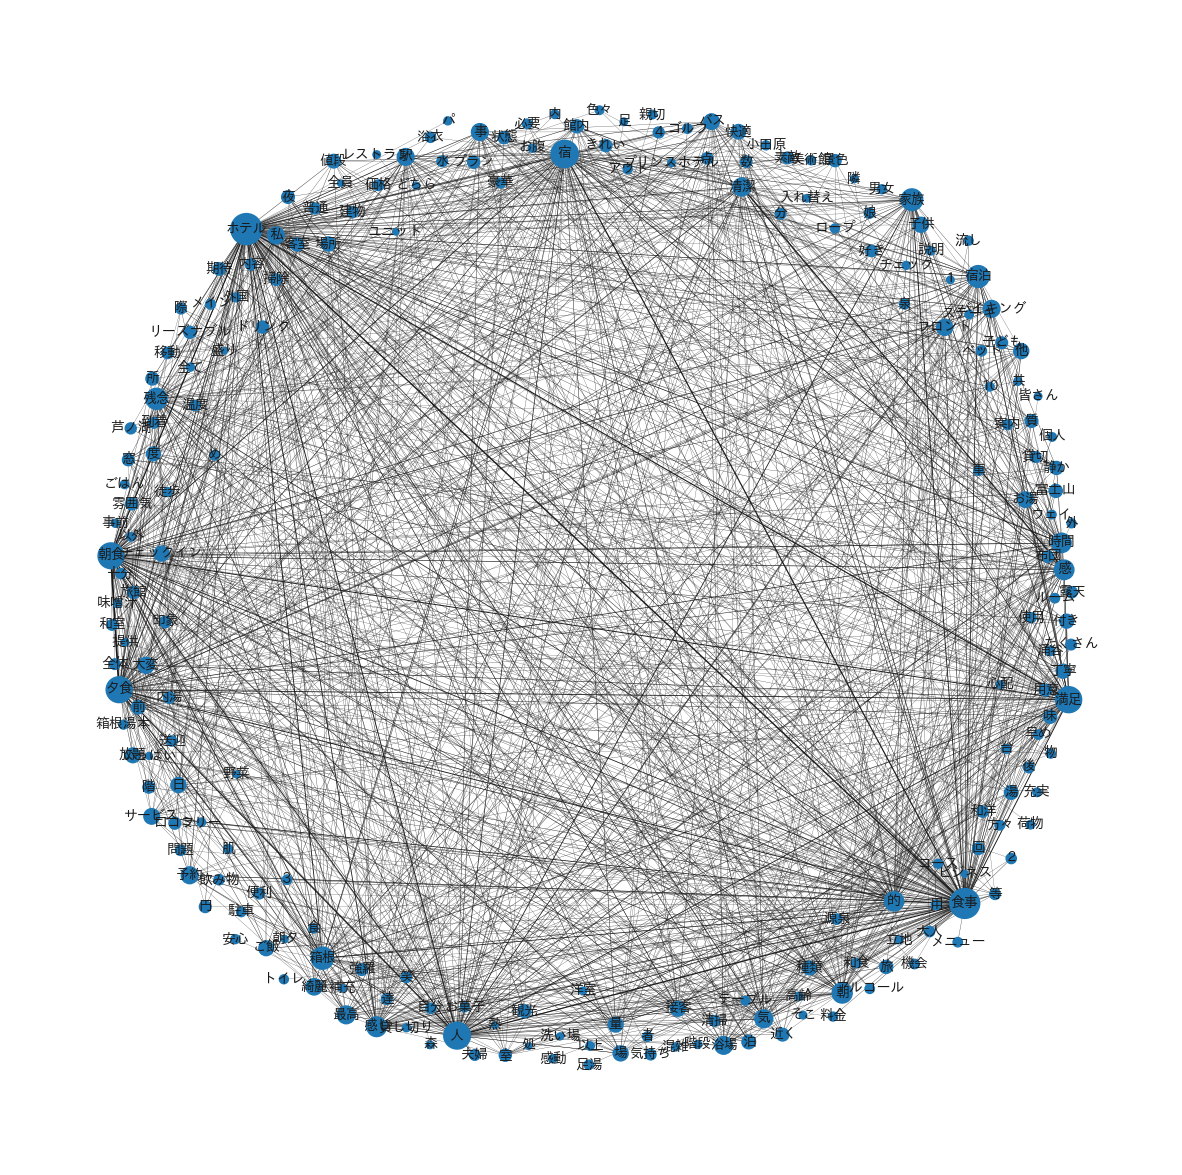

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import MeCab
import japanize_matplotlib
from sklearn.feature_extraction.text import CountVectorizer

# Define MeCab instance
mecab = MeCab.Tagger("-Ochasen")


top_n = 10

def count_cooccurrence(sents):
    count_model = CountVectorizer(token_pattern=r'\b\w+\b')
    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)
    X[X > 0] = 1
    Xc = (X.T * X)
    return words, word_counts, Xc, X 

def extract_words(text, include_pos, stopwords):
    nodes = mecab.parse(text).split("\n")
    words = []
    for node in nodes:
        parts = node.split("\t")
        if len(parts) > 3:
            word, pos = parts[0], parts[3]
            if pos.startswith(include_pos) and word not in stopwords:
                words.append(word)
    return words

def word_weights(words, word_counts):
    count_max = word_counts.max()
    weights = [{'word': word, 'weight': count / count_max} for word, count in zip(words, word_counts)]
    return weights

def cooccurrence_weights(words, Xc, weight_cutoff):
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [{'words': [words[i], words[j]], 'weight': Xc[i,j] / Xc_max} for i, j in zip(*Xc.nonzero()) if i < j and Xc[i,j] > cutoff]
    return weights

def create_network(words, word_counts, Xc, weight_cutoff):
    G = nx.Graph()
    weights_w = word_weights(words, word_counts)
    G.add_nodes_from((w['word'], {'weight': w['weight']}) for w in weights_w)
    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    for wc in weights_c:
        G.add_edge(wc['words'][0], wc['words'][1], weight=wc['weight'])
    G.remove_nodes_from(list(nx.isolates(G)))
    return G

def pyplot_network(G):
    plt.figure(figsize=(15, 15))  # グラフのサイズを大きくする
    
    # kの値を調整して、ノード間の距離を変更します。
    pos = nx.spring_layout(G, k=2.0)
    
    # ノードのサイズとエッジの幅を調整するためのスケーリング係数を変更します。
    weights_n = np.array(list(nx.get_node_attributes(G, 'weight').values()))
    nx.draw_networkx_nodes(G, pos, node_size=500 * weights_n)
    
    weights_e = np.array(list(nx.get_edge_attributes(G, 'weight').values()))
    nx.draw_networkx_edges(G, pos, width=3 * weights_e)
    
    # ラベルのフォントサイズを調整します。
    nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_size=10)
    
    plt.axis("off")
    plt.show()

# 4. Parameters
include_pos = ('名詞',) # Considering only nouns for simplicity

# ストップワード
stopwords = ('温泉','露天風呂','wi','fi','なに','以下','おすすめ','コス','みたい','今回','利用','部屋','風呂','料理',
'旅行','スタッフ','対応','お世話','しまう','くれる','ゆっくり','この','ちょっと','てる','良い','ただ','少し','思う','まで'
,'さん','せる','です','ます','から','なる','れる','こと','たい','ので','とても','もらう','もらえる','できる','また','ツル'
,'する', 'ある', 'ない', 'いう', 'もの', 'ところ', 'よう', 'これ', 'ため', 'それ', 'とき', 'それぞれ', 'これら', 'よる'
,'くる','1','2','3','一','さ','い','の','し','いる','よかっ','き','おか','なり','くれ','ん','そう','品数','何','二','肉'
,'どれ','こちら','中','ふき','おしり','しゃぶしゃぶ','ヶ所','フレンチ','パン','ビュッフェ','一つ','とこ','ここ','つき',
'小分け','ケーキ','わけ','トング','0','!','方','時')

# 5. Extract words from reviews using MeCab
sents = []
empty_reviews = 0
for review in df["口コミ"]:
    extracted = extract_words(review, include_pos, stopwords)
    if not extracted:
        empty_reviews += 1
    sents.extend([' '.join(extracted)])

# 6. Compute cooccurrence
words, word_counts, Xc, X = count_cooccurrence(sents)
# 1. 高頻度ワードの確認
top_n = 10
sorted_indices = np.argsort(word_counts)[::-1]
top_words = [words[i] for i in sorted_indices[:top_n]]

# これらを stopwords に追加するか検討（以下ではとりあえず追加）
stopwords += tuple(top_words)

# 2. ネットワークの中心性を基にしたワードの確認
G = create_network(words, word_counts, Xc, 0.05)
centrality = nx.betweenness_centrality(G)
top_centrality_words = sorted(centrality, key=centrality.get, reverse=True)[:5]

# これらを stopwords に追加するか検討（以下ではとりあえず追加）
stopwords += tuple(top_centrality_words)

# 7. Generate the co-occurrence network
weight_cutoff = 0.05
G = create_network(words, word_counts, Xc, weight_cutoff)

# 8. Visualize the network using japanize_matplotlib
pyplot_network(G)